

---


# Sebelum mengerjakan dibaca dengan seksama teorinya. **Rumus matematis untuk semua soal sudah ada di lembar ini**

## Deadline (06.00 AM WIB 15/06/2020)

## Jadwal update github: Rabu, Sabtu, Senin

## Untuk yang tidak mengerjakan di colab:
* Install matplotlib, atau
* Kode visualilasasi dihiraukan saja 




---



# <center>Estimasi nilai $\pi$ dengan Monte Carlo</center>
Dalam project kali ini kita akan membuat suatu program simulasi untuk mengestimasi nilai $\pi$ dengan menggunakan metode Monte Carlo. 

Monte Carlo merupakan sebuah algoritme matematis yang berdasarkan simulasi dari nilai-nilai random yang diulang-ulang berkali-kali untuk memprediksi distribusi suatu fenomena yang banyak digunakan untuk analisis resiko dan pengambilan keputusan.

## Project Items:
1. Estimasi luas lingkaran denga MC.
2. Estimasi nilai $\pi$ dengan MC.
3. Menghitung error relative dari estimasi $\pi$ dengan MC.

## Fungsi lingkaran:
$$L((x_0,y_0),r)	\equiv (x-x_0)^2+(y-y_0)^2=r^2$$
merupakan suatu lingkaran yang berpusat di $(x_0,y_0)$ (cth: _titik $\times$ pada gambar di bawah_) dengan jari-jari $r$. Titik-titik $(x,y)$ yang memenuhi persamaan tersebut merupakan suatu titik yang berada digaris lingkaran $L((x_0,y_0),r)	$.


**note: jari-jari, $r$, merupakan jarak dari titik pusat lingkaran  $(x_0,y_0)$ ke tepi/garis lingkaran, atau setengah dari diameter lingkaran.** 

Penjelasan mudahnya:
*  Jika suatu titik $(x,y)$ sedemikian hingga $(x-x_0)^2+(y-y_0)^2 < r^2$, maka titik tersebut berada di **DALAM** lingkaran $L((x_0,y_0),r)	$ -- 
(cth: titik $\triangle$).
*  Jika suatu titik $(x,y)$ sedemikian hingga $(x-x_0)^2+(y-y_0)^2 > r^2$, maka titik tersebut berada di **LUAR** lingkaran $L((x_0,y_0),r)	$ -- (cth: titik $+$).
*  Jika suatu titik $(x,y)$ sedemikian hingga $(x-x_0)^2+(y-y_0)^2 = r^2$, maka titik tersebut berada **TEPAT DI GARIS** lingkaran $L((x_0,y_0),r)	$ -- (cth: titik $\bigcirc$).

![alt text](https://github.com/sykrn/py-dts/blob/master/asets/linkaran.png?raw=true)





---


### 1. Buatlah sebuah fungsi `isPointInCircle` dengan posisional argument `x,y,r` dan keyword argument `center` dengan default value sebuah tupple dua nilai `(0,0)`. Untuk menentukan apakah titik `(x,y)` berada di dalam atau di luar lingkaran $L(\rm{center},r)$. Keluaran fungsi `isPointInCircle` merupakan suatu nilai boolean, `True` Jika titik `(x,y)` berada di dalam lingkaran dan `False` Jika berada di luar.
**Note: titik yang berada tepat di lingkaran dikategorikan sebagai dalam, maka `True`.**

In [ ]:
#Graded

def isPointInCircle(x,y,r,center=(0,0)):
  if (x-center[0])**2 + (y-center[1])**2 <= r**2:
    return True
  return False
  

In [ ]:
#CEK OUTPUT KODE ANDA
print(isPointInCircle(1,1,1,center=(0,0)),isPointInCircle(1,0,1,center=(0,0)),
      isPointInCircle(1,1,1,center=(1,0)),isPointInCircle(0,0,1,center=(1,1)))

False True True False


### Expected output
```
False True True False
```





---


## 2. `generateRandomSquarePoints` dengan dua positional argumen `n` dan `length`, dan keyword argument `center` default: tupple`(0,0)`. Fungsi ini akan mengeluarkan suatu list dengan jumlah `n` titik random `[x,y]` yang berada di dalam suatu kotak persegi dengan panjang `length` dan titik tengah `center`. Keluaran fungsi merupakan list dari `n` titik random `[x,y]`, cth: `[[x1,y1],...,[xn,yn]]`.

**hint:**

1. Jarak titik tengah `center` ke tepi persegi sama dengan `length/2`.
2. Untuk menghasilkan nilai random, gunakan `random.uniform`, penjelasan [random.uniform](https://docs.python.org/3/library/random.html#random.uniform). Untuk menentukan nilai `a` dan `b` dari fungsi random.uniform, coba perhatikan gambar di cell bawah dengan `center=(0,0)`. Note: harus fleksible ketika titik `center` berubah.
3. Gunakan list comprehension untuk men-generate n titik x,y tersebut.
4. Untuk menyelesaikan hanya butuh ubah satu baris kode, ganti `None` value, dengan kode anda.


In [ ]:
#Graded
import random


def generateRandomSquarePoints(n,length,center=(0,0)):
  # MULAI KODEMU DI SINI
  minx = center[0]-length/2
  miny = center[1]-length/2
  
  # Gunakan list comprehension dengan variable minx, miny, length, dan n
  points = [[random.uniform(minx, minx+length), random.uniform(miny, miny+length)] for _ in range(n)]

  return points


In [ ]:
#CEK OUTPUT KODE ANDA
random.seed(0)

# generate 100 point di dalam persegi dengan panjang sisi 1 dan berpusat di (0,0)
points = generateRandomSquarePoints(100,1)
print(points[10:15])



[[-0.18985243068066737, 0.22983174826012864], [0.3988382879679935, 0.18398393191544127], [-0.027857284547286643, -0.3992987919316342], [-0.06582816454621632, 0.1108869734438016], [0.4130110532378982, 0.4666063677707588]]


### Expected output:
```
[[-0.18985243068066737, 0.22983174826012864],
 [0.3988382879679935, 0.18398393191544127],
 [-0.027857284547286643, -0.3992987919316342],
 [-0.06582816454621632, 0.1108869734438016],
 [0.4130110532378982, 0.4666063677707588]]
 ```

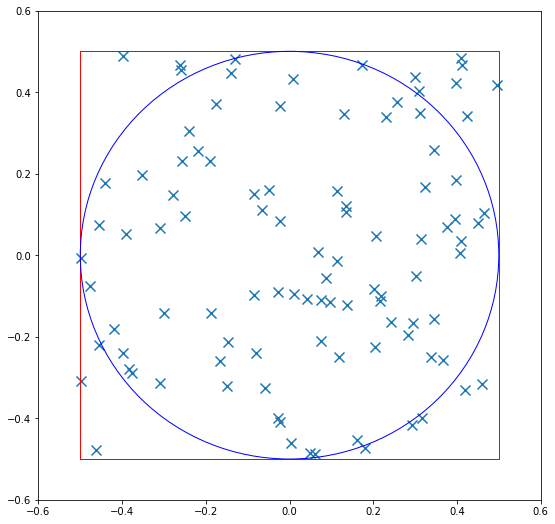

In [ ]:
#CEK OUTPUT KODE ANDA VISUALISASI
# Mari kita Visualisasikan 
# Jika sama dengan gambar di bawah ini maka keluaran sesuai harapan
import matplotlib.pyplot as plt
x,y = zip(*points)

# persegi dengan panjang sisi 1 dan berpusat di (0,0)
r1 = plt.Rectangle((-0.5,-0.5),1,1,color='r', fill=False)
c1 = plt.Circle((0,0), 0.5, color='b', fill=False)
fig, ax = plt.subplots(figsize=(9,9)) 
ax.add_artist(r1)
ax.add_artist(c1)
plt.xlim(-0.6,0.6)
plt.ylim(-0.6,0.6)
plt.scatter(x,y,s=100,marker='x')
plt.show()




---


## Menghitung Luas Lingkaran dengan estimasi MC
![alt text](https://github.com/sykrn/py-dts/blob/master/asets/persegilink.png?raw=true)

### Kita bisa mengestimasi luas lingkaran dengan MC sebagai berikut.
1. Buatlah titik-titik random sebanyak mungkin di dalam sebuah persegi yang bersinggungan dengan lingkaran yang berada di dalamnya yang akan kita hitung luasannya seperti gambar di atas.
2. Hitunglah jumlah titik-titik yang berada di dalam lingkaran tersebut.
3. Estimasi:

$$\frac{n_{titik-dalam-lingkaran}}{n_{total-titik}}=\frac{Luas Lingkaran}{Luas Persegi}$$
maka,
$$Luas Lingkaran=\frac{n_{titik-dalam-lingkaran}}{n_{total-titik}}\times Luas Persegi$$
di mana,
$$Luas Persegi = sisi \times sisi$$
mudah untuk dihitung.



---


## 3. Buatlah fungsi `MCCircleArea` dengan positional argument `r` dan keyword argument dengan default `n=100` dan `center=(0,0)`, untuk menghitung luas lingkaran dengan jari-jari r dengan mengestimasi dari `n` titik random. Keluaran fungsi merupakan suatu nilai yang menunjukkan estimasi luas lingkaran tersebut.

**hint:**
1. gunakan fungsi yang sudah dibuat di atas `isPointInCircle` dan `generateRandomSquarePoints`.
2. perhatikan gambar lingkaran dan persegi di atas, jari-jari $r$ lingkaran sama dengan setengah dari panjang sisi persegi.
3. lingkaran dan persegi memiliki pusat yang sama.






In [ ]:
#Graded

def MCCircleArea(r,n=100,center=(0,0)):
  length = r*2
  in_circle = 0
  points = generateRandomSquarePoints(n, length, center)

  for p in points:
    x = p[0]
    y = p[1]
    if isPointInCircle(x, y, r, center):
      in_circle += 1
      
  lp = length*length
  return in_circle / n * lp

In [ ]:
#CEK OUTPUT KODE ANDA

random.seed(0)
print(MCCircleArea(1,100),MCCircleArea(1,10,center=(10,10)))

3.28 3.2


### Expected output:
```
3.28 3.2
 ```



---
## Estimasi $\pi$

### Luas lingkaran
$$Luas = \pi r^2$$

sehingga untuk mengestimasi nilai $\pi$ sama dengan mengestimasi luas lingkaran dengan jari-jari $r=1$.

### Law of large numbers (LLN)
merupakan hukum statistik dimana kita bisa menghitung nilai rata-rata dari suatu distribusi atau bahkan standar deviasinya dengan menggunakan banyak sampel. LLN umum digunakan di dalam metode MC.

Penjelasan mudahnya: Semakin banyak sampel semakin akurat untuk menghitung rata-rata atau nilai mean-nya. 

### Estimasi $\pi$ lebih akurat dengan LLN
1. Estimasi luas lingkaran dengan jari-jari satu dengan menggunakan sejumlah titik-titik random.
2. lakukan sebanyak mungkin langkah 1.
3. ambil nilai rata-ratanya, yaitu $\mu = \sum x/n$, yang merupakan estimasi akhir dari metode MC.




## 4. Buatlah fungsi `LLNPiMC` untuk mengestimasi nilai `pi` dengan positional argumen `nsim` dan `nsample`. `nsample` merupakan jumlah sample titik-titik random untuk menghitung luas lingkaran berjari-jari 1 (maka Luas = $\pi$) dan `nsim` merupakan jumlah simulasi untuk menghitung nilai rata-rata atau mean dari estimasi nilai $\pi$. Keluaran fungsi merupakan nilai mean dari simulasi tersebut (estimasi nilai $\pi$).

In [ ]:
#Graded

def LLNPiMC(nsim,nsample):
  sim = [MCCircleArea(1, nsample) for _ in range(nsim)]
  x = 0
  for res in sim:
    x += res

  return x/nsim

In [ ]:
#CEK OUTPUT KODE ANDA

import math

random.seed(0)
estpi = LLNPiMC(10000,500)

print('est_pi:',estpi)
print('act_pi:',math.pi)

est_pi: 3.1416055999999823
act_pi: 3.141592653589793


### Expected output:
```
est_pi: 3.1416055999999823
act_pi: 3.141592653589793
 ```

## Menghitung error relatif

$$E = \|\frac{estimasi-aktual}{aktual}\|\times 100$$

$\|\dots\|$ merupakan nilai absolut atau mutlak (selalu positif).

## 5. Buatlah fungsi `relativeError`, dengan argument `act` yang merupakan nilai aktual, dan `est` yang merupakan nilai estimasi.

In [ ]:
# Graded
def relativeError(act,est):
  return abs((est-act)/act)*100

In [ ]:
#CEK OUTPUT KODE ANDA
print('error relatif:',relativeError(math.pi,estpi),'%')

error relatif: 0.0004120970353822341 %


### Expected output:
```
error relatif: 0.0004120970353822341 %
 ```

# Cara Submit
0. Isikan variable priority dengan nilai yang lebih besar dari submisi sebelumnya untuk revisi.
1. Tuliskan email akun netacad anda di variable email (tentunya dengan tanda kutip) 
2. Copy-paste **SEMUA** cell yang ada komentar `#Graded` ke cell code di bawah ini.
3. Simpan kode tersebut sebagai p2.py
4. Submit file ke google form berikut: https://forms.gle/oVt17KbpFwQvTmG2A
5. Pengisian form membutuhkan anda login ke akun google anda.



In [ ]:
# nama file p2.py 
# Isikan email anda dan copy semua cell code yang dengan komentar #Graded

# untuk revisi dan resubmisi sebelum deadline
# silakan di resubmit dengan nilai variable priority yang lebih besar dari
# nilai priority submisi sebelumnya
# JIKA TIDAK ADA VARIABLE priority DIANGGAP priority=0
priority = 0

#netacad email cth: 'abcd@gmail.com'
email=''
 
# copy-paste semua #Graded cells YANG SUDAH ANDA KERJAKAN di bawah ini